<a href="https://colab.research.google.com/github/LTrinhKhang/AI-Week-1/blob/main/AI_W6_11_3_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7d2dbed5320741d342c2b4672c5f12facd6260429a5d58eced892b8f2634a34a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

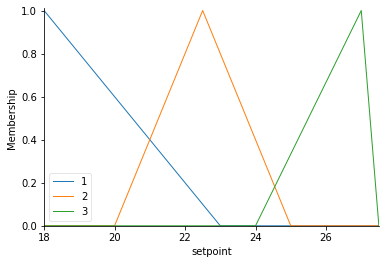

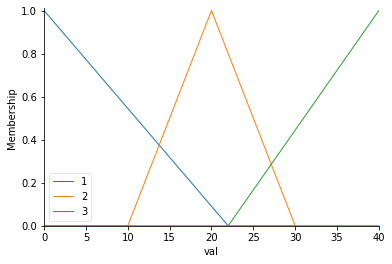

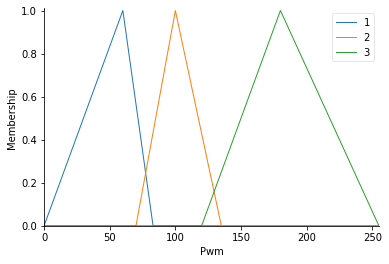

In [ ]:
setpoint  = ctrl.Antecedent(np.arange(18,28,0.5),'setpoint')
val  = ctrl.Antecedent(np.arange(0,41,1),'val') 
Pwm = ctrl.Consequent(np.arange(0,256,1),'Pwm')
setpoint ['1']=fuzz.trimf(setpoint.universe,[18,18,23])
setpoint ['2']=fuzz.trimf(setpoint.universe,[20,22.5,25])
setpoint ['3']=fuzz.trimf(setpoint.universe,[24,27,27])


val ['1']=fuzz.trimf(val.universe,[0,0,22])
val ['2']=fuzz.trimf(val.universe,[10,20,30])
val ['3']=fuzz.trimf(val.universe,[22,40,40])


Pwm ['1']=fuzz.trimf(Pwm.universe,[0,60,83])
Pwm ['2']=fuzz.trimf(Pwm.universe,[70,100,135])
Pwm ['3']=fuzz.trimf(Pwm.universe,[120,180,255])



setpoint.view()
val.view()
Pwm.view()


In [ ]:
#tao luat cho bang dieu khien
rule1=ctrl.Rule(setpoint['1']&val['1'],Pwm['1'])
rule2=ctrl.Rule(setpoint['1']&val['2'],Pwm['1'])
rule3=ctrl.Rule(setpoint['1']&val['3'],Pwm['1'])
rule4=ctrl.Rule(setpoint['2']&val['1'],Pwm['1'])
rule5=ctrl.Rule(setpoint['2']&val['2'],Pwm['2'])
rule6=ctrl.Rule(setpoint['2']&val['3'],Pwm['3'])
rule7=ctrl.Rule(setpoint['3']&val['1'],Pwm['3'])
rule8=ctrl.Rule(setpoint['3']&val['2'],Pwm['3'])
rule9=ctrl.Rule(setpoint['3']&val['3'],Pwm['3'])

167.27735633893587


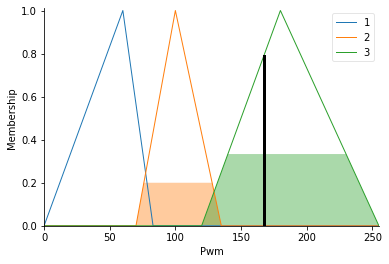

In [ ]:
Pwmm_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
Pwmm=ctrl.ControlSystemSimulation(Pwmm_ctrl)

Pwmm.input['setpoint']=23
Pwmm.input['val']=28

Pwmm.compute()
print(Pwmm.output['Pwm'])
Pwm.view(sim=Pwmm)

70.41666666666676
119.88795895909844


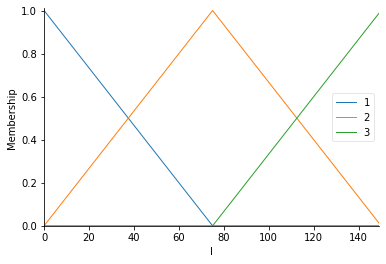

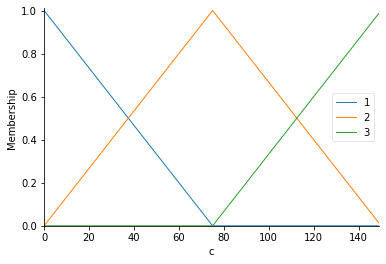

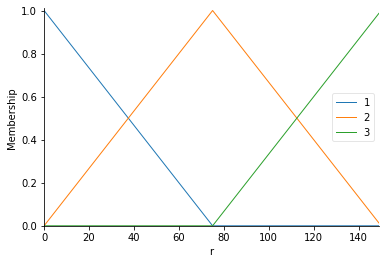

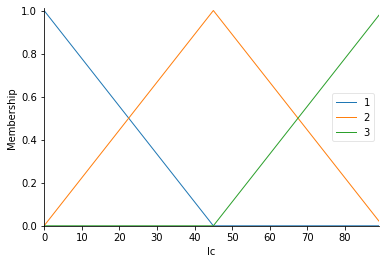

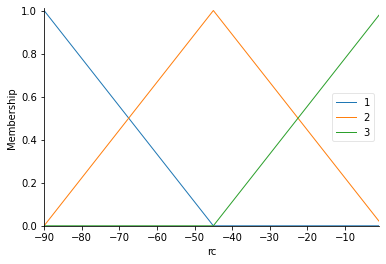

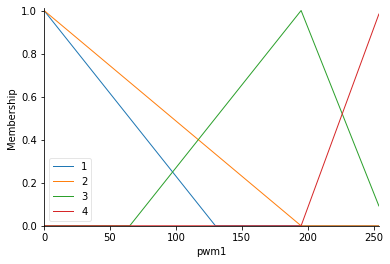

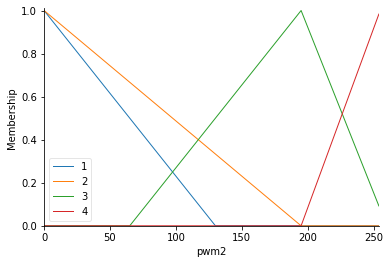

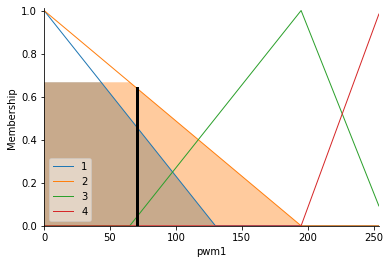

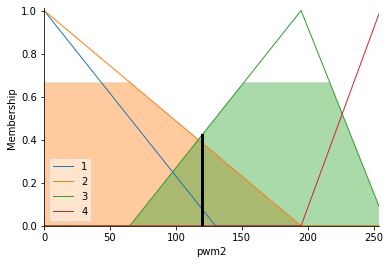

In [ ]:
from re import L
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

l = ctrl.Antecedent(np.arange(0, 150, 1), 'l')
c = ctrl.Antecedent(np.arange(0, 150, 1), 'c')
r = ctrl.Antecedent(np.arange(0, 150, 1), 'r')
lc= ctrl.Antecedent(np.arange(0, 90, 1), 'lc')
rc= ctrl.Antecedent(np.arange(-90, 0, 1), 'rc')
pwm1 = ctrl.Consequent(np.arange(0, 255, 1), 'pwm1')
pwm2 = ctrl.Consequent(np.arange(0, 255, 1), 'pwm2')
lc= ctrl.Consequent(np.arange(0, 90, 1), 'lc')
rc= ctrl.Consequent(np.arange(-90, 0, 1), 'rc')


l ['1']=fuzz.trimf(l.universe,[0,0,75])
l ['2']=fuzz.trimf(l.universe,[0,75,150])
l ['3']=fuzz.trimf(l.universe,[75,150,150])


c ['1']=fuzz.trimf(c.universe,[0,0,75])
c ['2']=fuzz.trimf(c.universe,[0,75,150])
c ['3']=fuzz.trimf(c.universe,[75,150,150])

r ['1']=fuzz.trimf(r.universe,[0,0,75])
r ['2']=fuzz.trimf(r.universe,[0,75,150])
r ['3']=fuzz.trimf(r.universe,[75,150,150])

lc ['1']=fuzz.trimf(lc.universe,[0,0,45])
lc ['2']=fuzz.trimf(lc.universe,[0,45,90])
lc ['3']=fuzz.trimf(lc.universe,[45,90,90])

rc ['1']=fuzz.trimf(rc.universe,[-90,-90,-45])
rc ['2']=fuzz.trimf(rc.universe,[-90,-45,0])
rc ['3']=fuzz.trimf(rc.universe,[-45,0,0])

pwm1['1']=fuzz.trimf(pwm1.universe,[0,0,130])
pwm1['2']=fuzz.trimf(pwm1.universe,[0,0,195])
pwm1['3']=fuzz.trimf(pwm1.universe,[65,195,260])
pwm1['4']=fuzz.trimf(pwm1.universe,[195,255,255])

pwm2['1']=fuzz.trimf(pwm2.universe,[0,0,130])
pwm2['2']=fuzz.trimf(pwm2.universe,[0,0,195])
pwm2['3']=fuzz.trimf(pwm2.universe,[65,195,260])
pwm2['4']=fuzz.trimf(pwm2.universe,[195,255,255])

l.view()
c.view()
r.view()
lc.view()
rc.view()
pwm1.view()
pwm2.view()


rule1=ctrl.Rule(l['1']&c['1']&r['2'],rc['1'])
rule2=ctrl.Rule(l['1']&c['1']&r['3'],rc['2'])
rule3=ctrl.Rule(l['2']&c['2']&r['1'],rc['2'])ss
rule4=ctrl.Rule(l['2']&c['2']&r['3'],rc['3'])
rule5=ctrl.Rule(l['3']&c['3']&r['1'],rc['1'])
rule6=ctrl.Rule(l['3']&c['3']&r['2'],rc['2'])


rule7=ctrl.Rule(r['1']&c['1']&l['2'],lc['1'])
rule8=ctrl.Rule(r['1']&c['1']&l['3'],lc['2'])
rule9=ctrl.Rule(r['2']&c['2']&l['1'],lc['2'])
rule11=ctrl.Rule(r['2']&c['2']&l['3'],lc['3'])
rule12=ctrl.Rule(r['3']&c['3']&l['1'],lc['1'])
rule13=ctrl.Rule(r['3']&c['3']&l['2'],lc['2'])



rule14=ctrl.Rule(l['1']&c['1']&r['1'],[pwm1['4'],pwm2['4']])
rule15=ctrl.Rule(l['2']&c['2']&r['2'],[pwm1['2'],pwm2['2']])
rule16=ctrl.Rule(l['3']&c['3']&r['3'],[pwm1['1'],pwm2['1']])
rule17=ctrl.Rule(lc['1'],[pwm1['3'],pwm2['4']])
rule18=ctrl.Rule(lc['2'],[pwm1['2'],pwm2['3']])
rule19=ctrl.Rule(lc['3'],[pwm1['1'],pwm2['2']])
rule20=ctrl.Rule(rc['1'],[pwm1['3'],pwm2['4']])
rule21=ctrl.Rule(rc['2'],[pwm1['2'],pwm2['3']])
rule22=ctrl.Rule(rc['2'],[pwm1['1'],pwm2['2']])


MB_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22])
MB=ctrl.ControlSystemSimulation(MB_ctrl)

MB.input['r']=20
MB.input['l']=50
MB.input['c']=75
MB.compute()
print(MB.output['pwm1'])
print(MB.output['pwm2'])

pwm1.view(sim=MB)
pwm2.view(sim=MB)
